<a href="https://colab.research.google.com/github/wahaneswati1208/swati/blob/main/task_1_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

OASIS INTERNSHIP TASK 1

#DATA LOADING AND CLEANING

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
retail=pd.read_csv("/content/retail_sales_dataset.csv")
retail

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [ ]:
retail.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [ ]:
retail.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [ ]:
retail.dropna()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [ ]:
retail['Date'] = pd.to_datetime(retail['Date'])

In [ ]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB


#Descriptive Statistics

In [ ]:
if 'Total Amount' in retail.columns:
    mean_sales = retail['Total Amount'].mean()
    median_sales = retail['Total Amount'].median()
    mode_sales = retail['Total Amount'].mode()[0]
    std_sales = retail['Total Amount'].std()
    print(f'Mean Sales: {mean_sales:.2f}')
    print(f'Median Sales: {median_sales:.2f}')
    print(f'Mode Sales: {mode_sales:.2f}')
    print(f'Standard Deviation of Sales: {std_sales:.2f}')
else:
    print('The "Total Amount" column is not in the dataset')

Mean Sales: 456.00
Median Sales: 135.00
Mode Sales: 50.00
Standard Deviation of Sales: 560.00


#Time Series Analysis

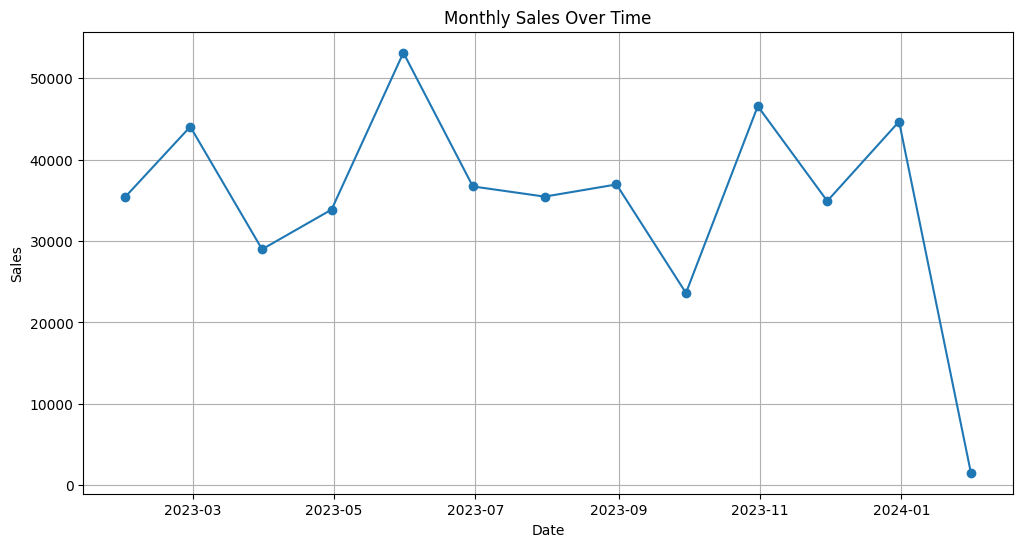

In [ ]:
retail.set_index('Date', inplace=True)
monthly_sales = retail['Total Amount'].resample('M').sum()
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, marker='o')
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()




#Customer and Product Analysis

In [ ]:
customer_stats = retail.groupby('Customer ID').agg({
    'Total Amount': ['sum', 'mean', 'count'],
    'Age': 'mean',
    'Gender': 'count'
}).reset_index()
print(customer_stats.head())
product_stats = retail.groupby('Product Category').agg({
    'Total Amount': ['sum', 'mean', 'count'],
    'Quantity': 'sum'
}).reset_index()
print(product_stats.head())


  Customer ID Total Amount                 Age Gender
                       sum    mean count  mean  count
0     CUST001          150   150.0     1  34.0      1
1     CUST002         1000  1000.0     1  26.0      1
2     CUST003           30    30.0     1  50.0      1
3     CUST004          500   500.0     1  37.0      1
4     CUST005          100   100.0     1  30.0      1
  Product Category Total Amount                   Quantity
                            sum        mean count      sum
0           Beauty       143515  467.475570   307      771
1         Clothing       155580  443.247863   351      894
2      Electronics       156905  458.786550   342      849


#Visualization

#BAR GRAPH

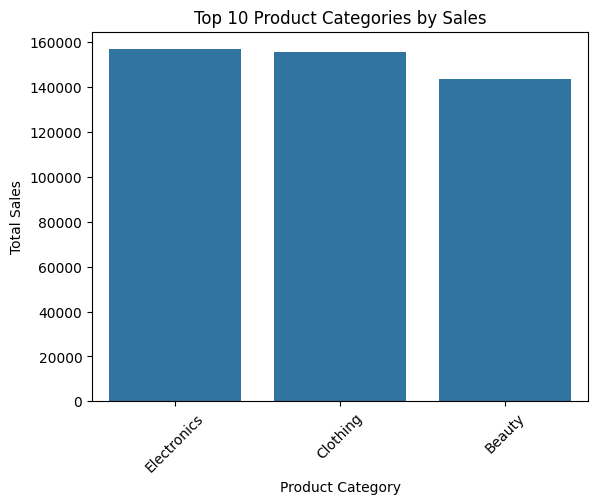

In [ ]:
top_products = product_stats.sort_values(('Total Amount', 'sum'), ascending=False).head(10)
sns.barplot(x=top_products['Product Category'], y=top_products[('Total Amount', 'sum')])
plt.title('Top 10 Product Categories by Sales')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


#LINE GRAPH

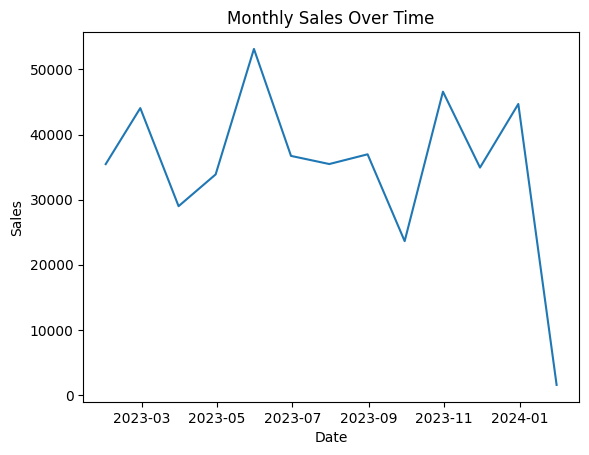

In [ ]:
sns.lineplot(data=monthly_sales)
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

#HEATMAP

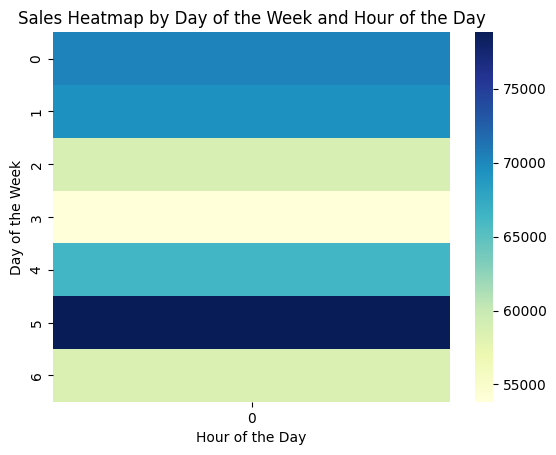

In [ ]:
retail['DayOfWeek'] = retail.index.dayofweek
retail['HourOfDay'] = retail.index.hour
heatmap_data = retail.pivot_table(index='DayOfWeek', columns='HourOfDay', values='Total Amount', aggfunc='sum')
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title('Sales Heatmap by Day of the Week and Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()

In [ ]:
print("Recommendations:")
print("1. Seasonal Promotions: Identify peak sales months and plan promotions accordingly to boost sales during high-demand periods.")
print("2. Customer Segmentation: Segment customers based on purchasing behavior and demographics to target marketing campaigns more effectively.")
print("3. Product Inventory Management: Focus on top-selling products to optimize inventory levels and reduce stockouts or overstock situations.")
print("4. Time-based Marketing: Utilize the sales heatmap to optimize marketing efforts during peak shopping hours and days of the week.")
print("5. Customer Retention Strategies: Implement loyalty programs for high-value customers based on their spending patterns.")

Recommendations:
1. Seasonal Promotions: Identify peak sales months and plan promotions accordingly to boost sales during high-demand periods.
2. Customer Segmentation: Segment customers based on purchasing behavior and demographics to target marketing campaigns more effectively.
3. Product Inventory Management: Focus on top-selling products to optimize inventory levels and reduce stockouts or overstock situations.
4. Time-based Marketing: Utilize the sales heatmap to optimize marketing efforts during peak shopping hours and days of the week.
5. Customer Retention Strategies: Implement loyalty programs for high-value customers based on their spending patterns.
